# Proyecto - Punto 2
Juliana Parra Caro - 1000613027 //
William Pinilla - 1000048878 //
Alejandro Duarte - 1001097142

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import glob

In [ ]:
path = '/home/estudiante/Descargas/NetCDF_Data/'
ds_cams = xr.open_dataset(f'{path}particulate_matter_2.5um_CAMS.nc')


In [ ]:
#forma 1
#dms_cams['pm2p5']
#forma 2
ds_cams.pm2p5 #tiene tiempo, latitud y logitud

<xarray.DataArray 'pm2p5' (valid_time: 17536, latitude: 99, longitude: 71)> Size: 493MB
[123260544 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 140kB 2019-01-01 ... 2024-12-31T2...
  * latitude    (latitude) float64 792B 17.5 16.75 16.0 ... -54.5 -55.25 -56.0
  * longitude   (longitude) float64 568B -85.0 -84.25 -83.5 ... -33.25 -32.5
Attributes: (12/33)
    GRIB_paramId:                             210073
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      7029
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_units:                               kg m**-3
    long_name:                                Particulate matter d <= 2.5 um
    units:                                    kg m**-3
    standard_name:                            mass_concentration_of_pm2p5_amb...
    GRIB_number:                              0
    GRIB_surface:                             0.0

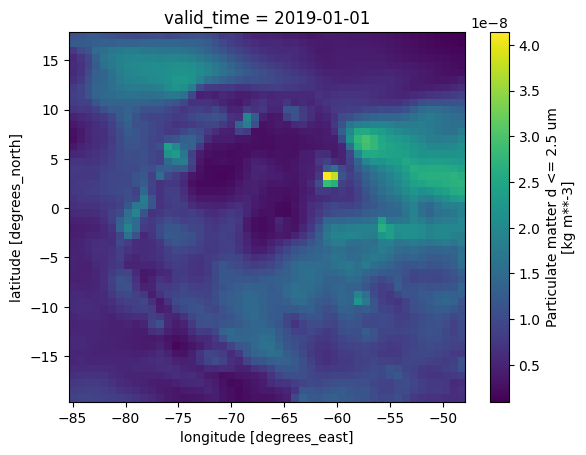

In [ ]:
ds_cams.pm2p5[0,0:50,0:50].plot()

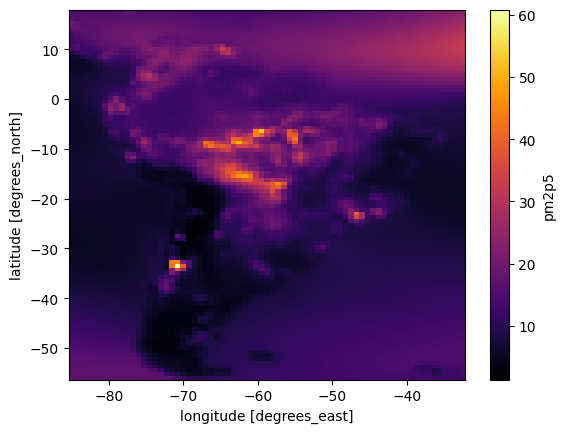

In [ ]:
##CDO timmean

#promedio de todooo
(ds_cams.pm2p5.mean(dim='valid_time')*1e9).plot(cmap='inferno')
#1e9 multiplicar para cambiar escala y que queden microgramos por m³

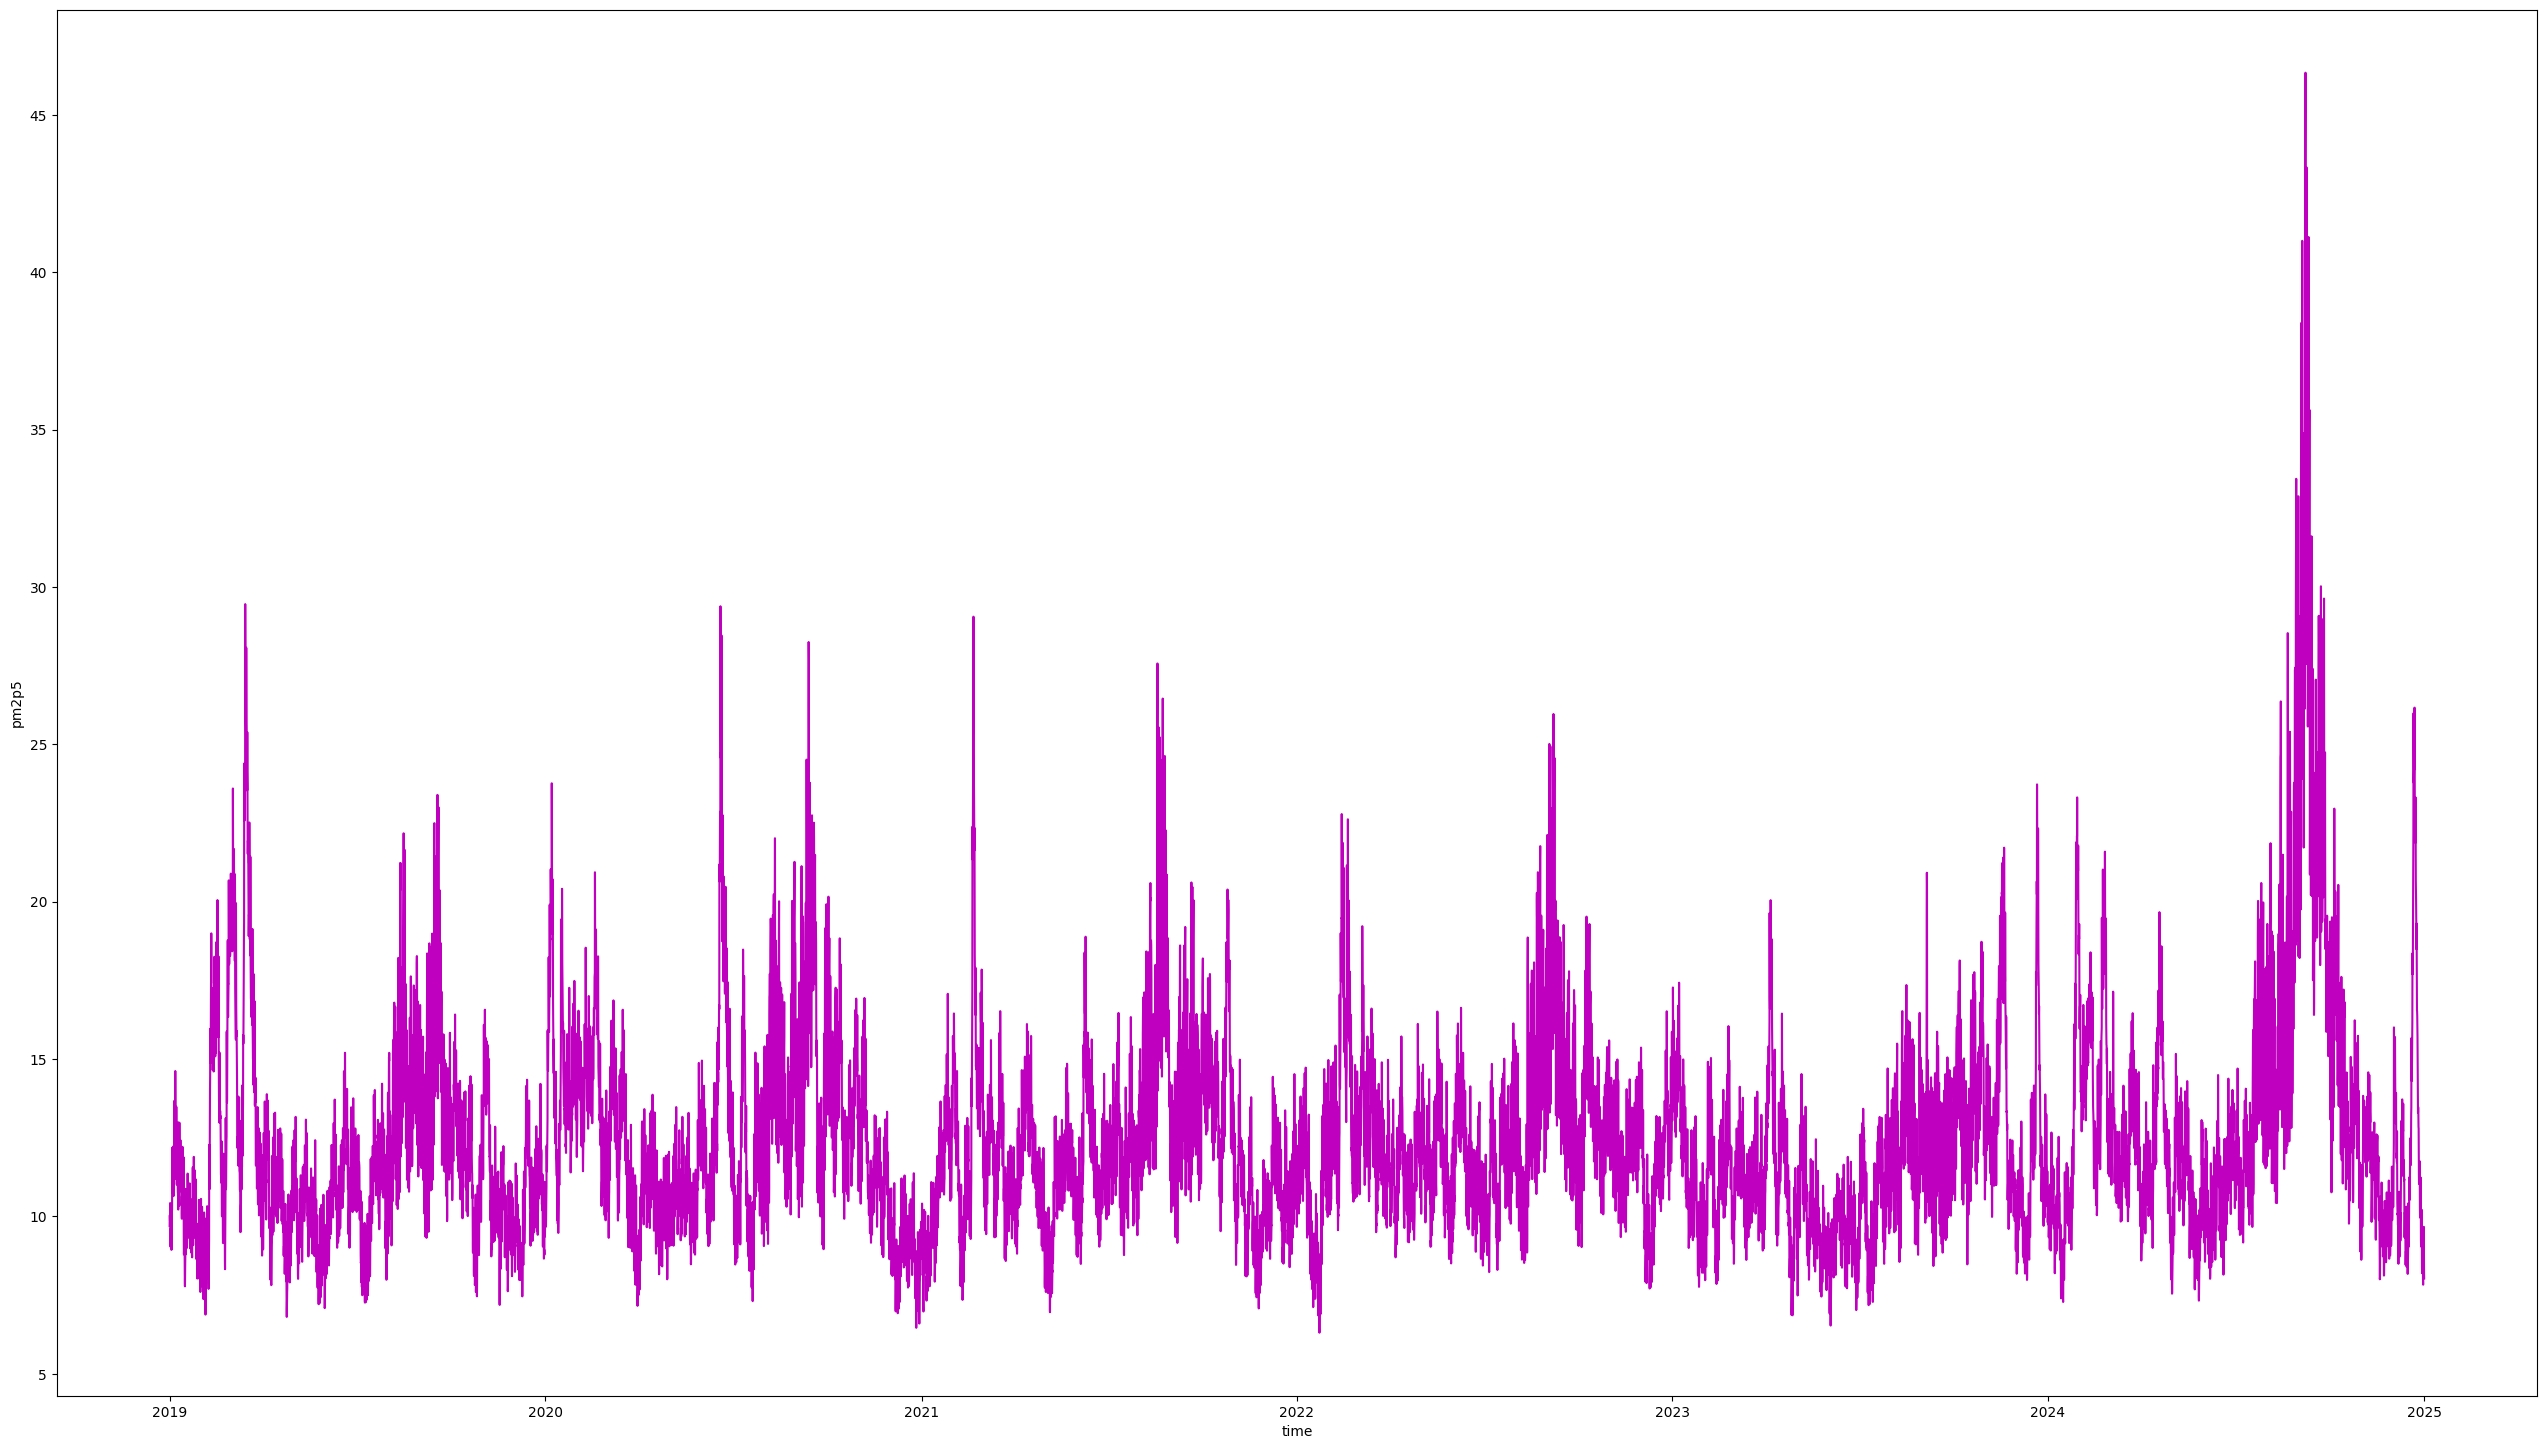

In [ ]:
### CDO FLDMEAN
plt.figure(figsize=(32,18))
#Lo mismo pero en ves de tiempo, latitud y logitud
(ds_cams['pm2p5'].mean(dim=['latitude','longitude'])*1e9).plot(color='m')

In [ ]:
#dividir por meses

monthly_mean = ds_cams.groupby('valid_time.month').mean('valid_time')
seasonal_mean = ds_cams.groupby('valid_time.season').mean('valid_time')
seasonal_mean = seasonal_mean.sel(season=['DJF','MAM','JJA','SON'])



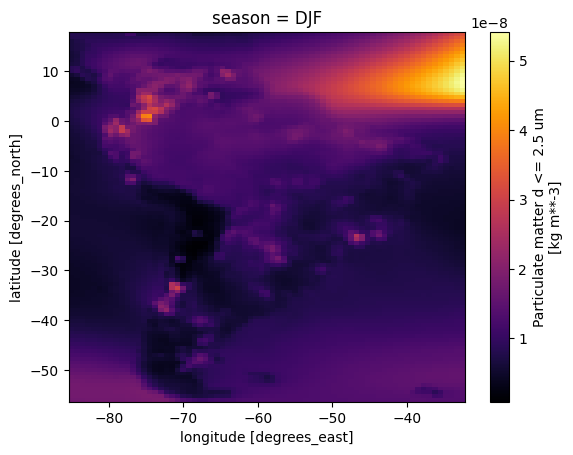

In [ ]:
seasonal_mean.pm2p5[0,:,:].plot(cmap='inferno')

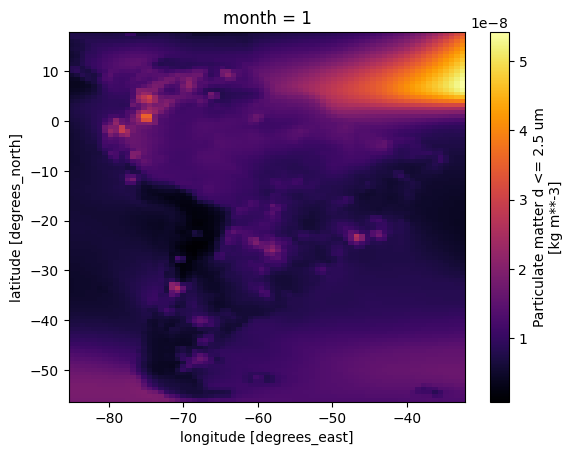

In [ ]:
monthly_mean.pm2p5[0,:,:].plot(cmap='inferno')

# Ejercicio
En un for, graficar todos los meses. En otro for, graficar todas las temporadas

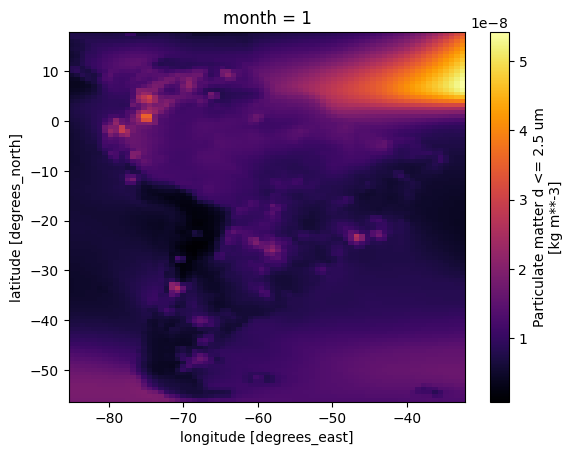

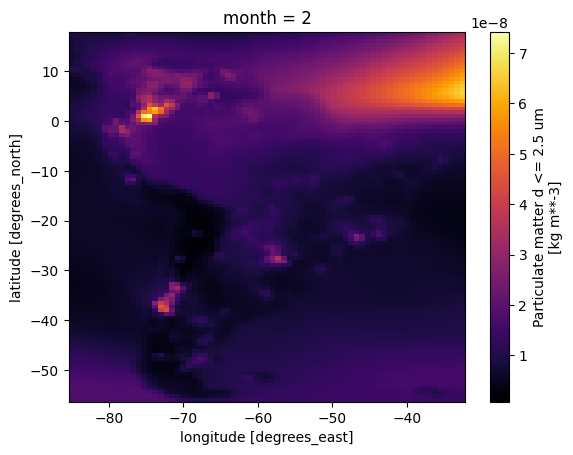

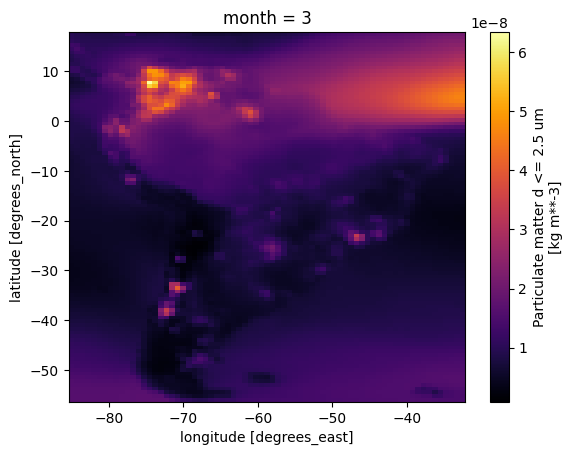

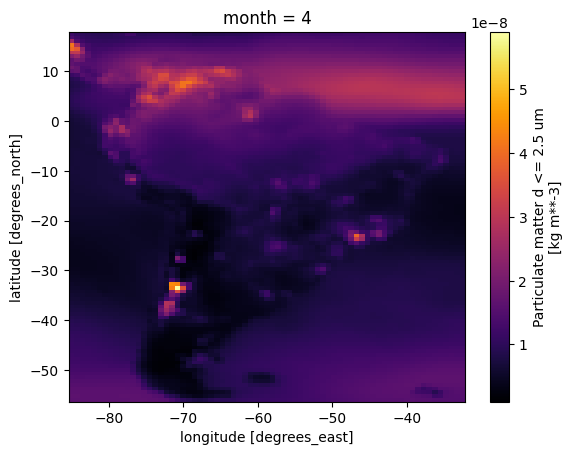

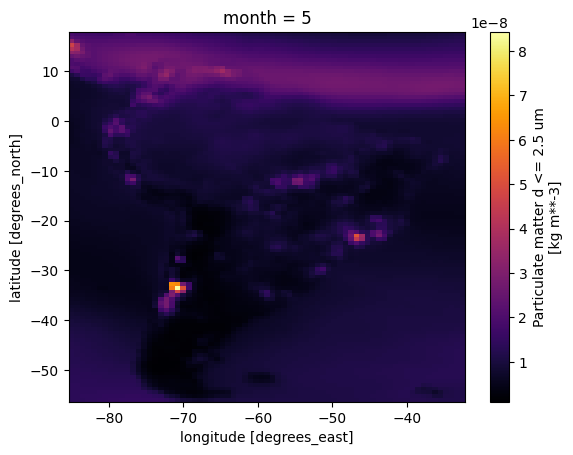

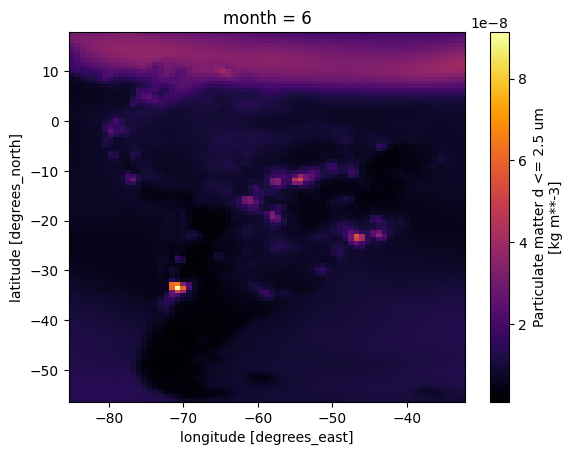

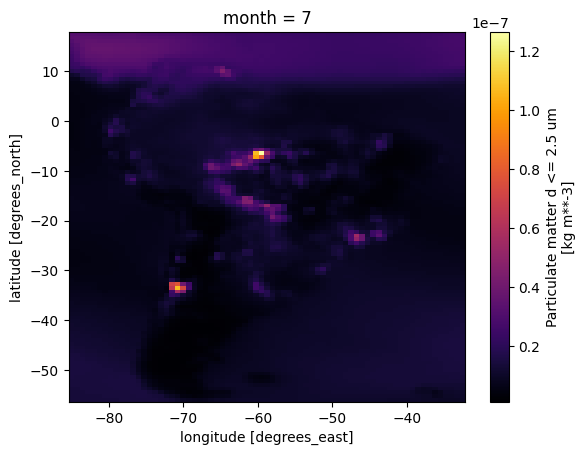

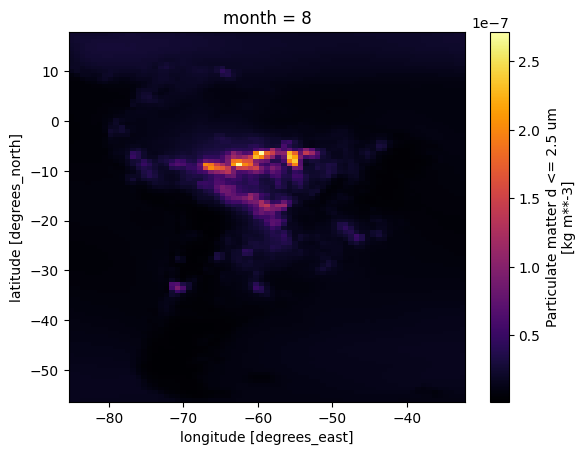

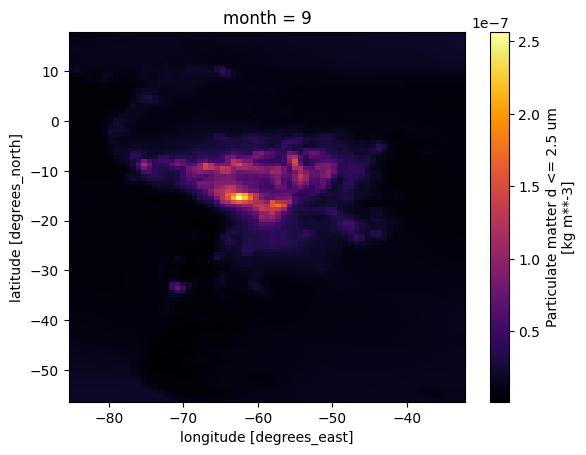

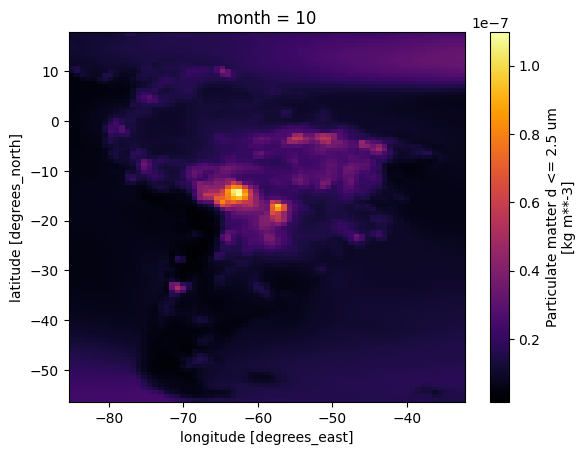

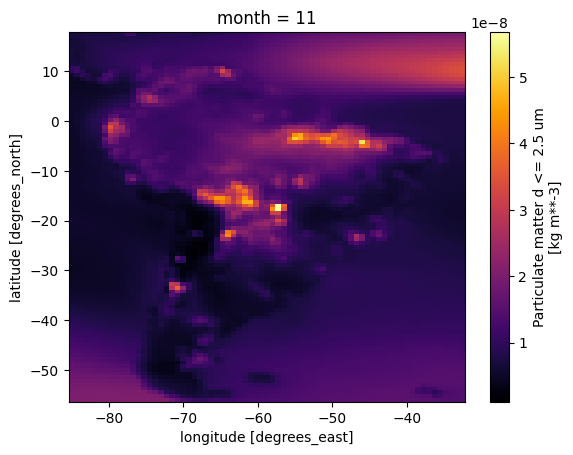

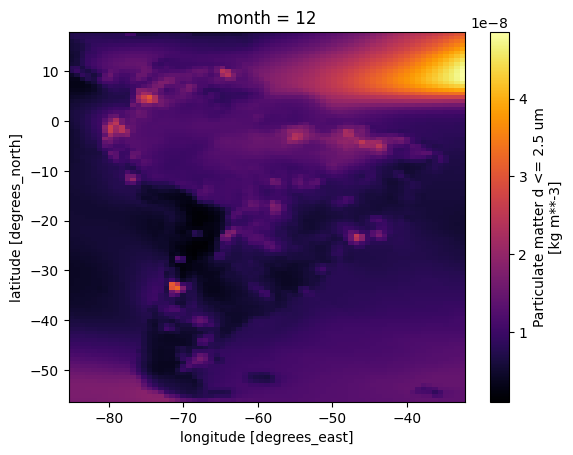

In [ ]:
for i, month in enumerate(monthly_mean.month):
    # Seleccionar datos del mes y graficar
    monthly_mean.pm2p5[i,:,:].plot(cmap='inferno')
    plt.show()

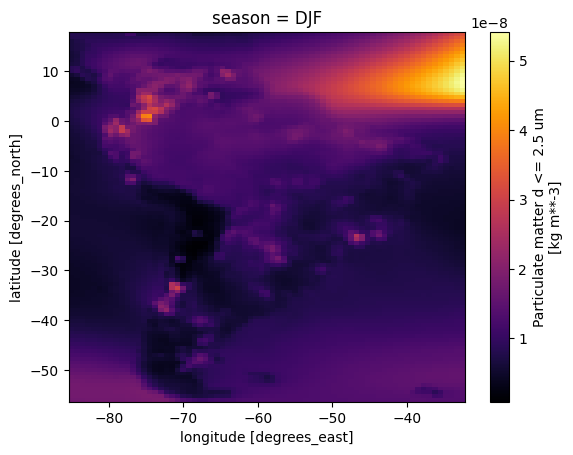

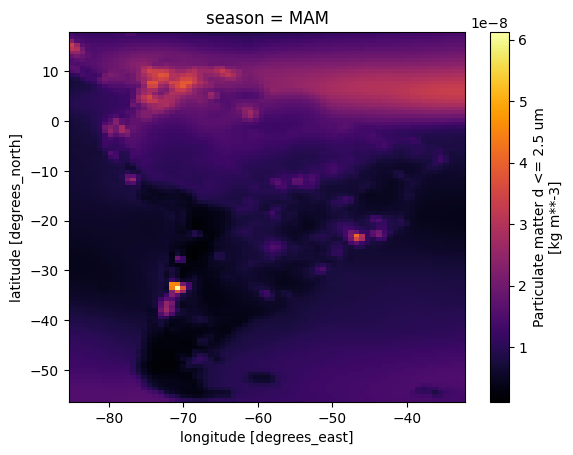

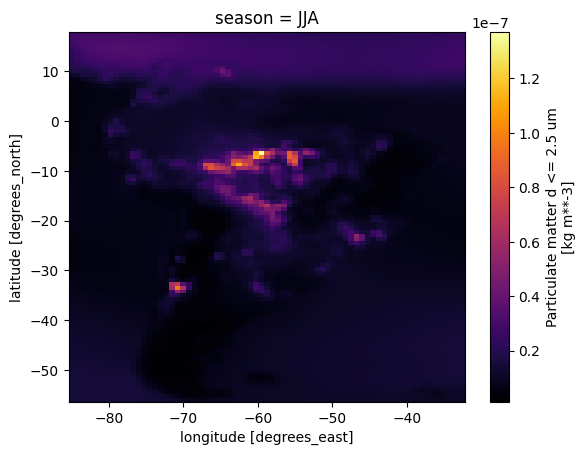

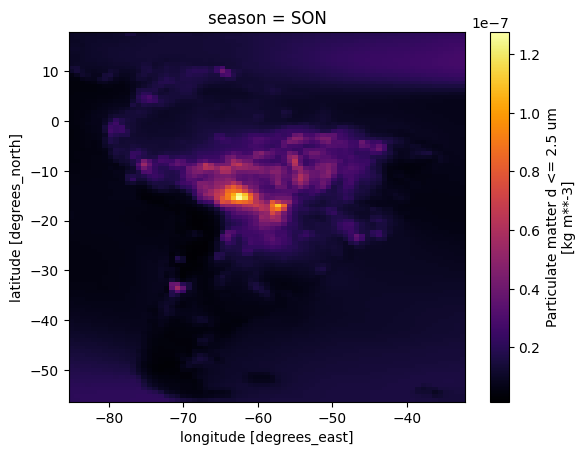

In [ ]:
for i, season in enumerate(seasonal_mean.season):
    # Seleccionar datos del mes y graficar
    seasonal_mean.pm2p5[i,:,:].plot(cmap='inferno')
    plt.show()

## Cartopy

In [ ]:
import cartopy.crs as ccrs #
import cartopy.feature as cfeat #
from pylab import *

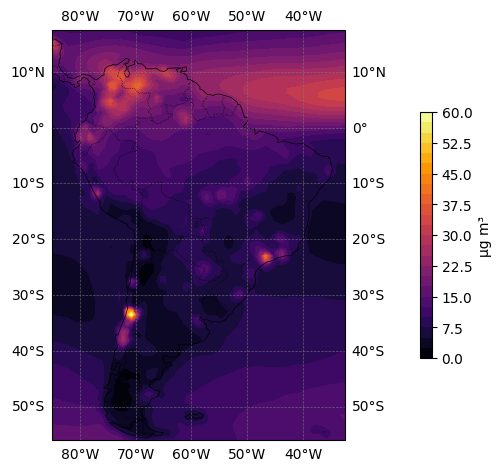

In [ ]:
fig = plt.figure(figsize=(9,5))
gs = gridspec.GridSpec(1,1,left = 0.09, right = 1.75, hspace = 0.2, top = 0.9, bottom = 0.08)
ax = plt.subplot(gs[0], projection = ccrs.PlateCarree())

mesh = plt.contourf(seasonal_mean.longitude, seasonal_mean.latitude, seasonal_mean.pm2p5[1]*1e9, transform = ccrs.PlateCarree(),
                    levels = np.arange(0,60.1,2.5), cmap = 'inferno')
ax.coastlines(linewidth=0.5) #bordes costeros
ax.add_feature(cfeat.BORDERS, linewidth=0.5, linestyle = ':') #división política
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color = 'grey', alpha=0.7, linestyle = '--') #lineas de grilla
bar = plt.colorbar(mesh, orientation = 'vertical', ax=ax, shrink = 0.6) #barra
bar.set_label('μg m³')
plt.show()


/tmp/ipykernel_4832/3936474011.py:7: UserWarning: Adding colorbar to a different Figure <Figure size 900x500 with 2 Axes> than <Figure size 2000x1200 with 1 Axes> which fig.colorbar is called on.
  fig.colorbar(mesh,cax=cbar_ax, label = 'μg m³')


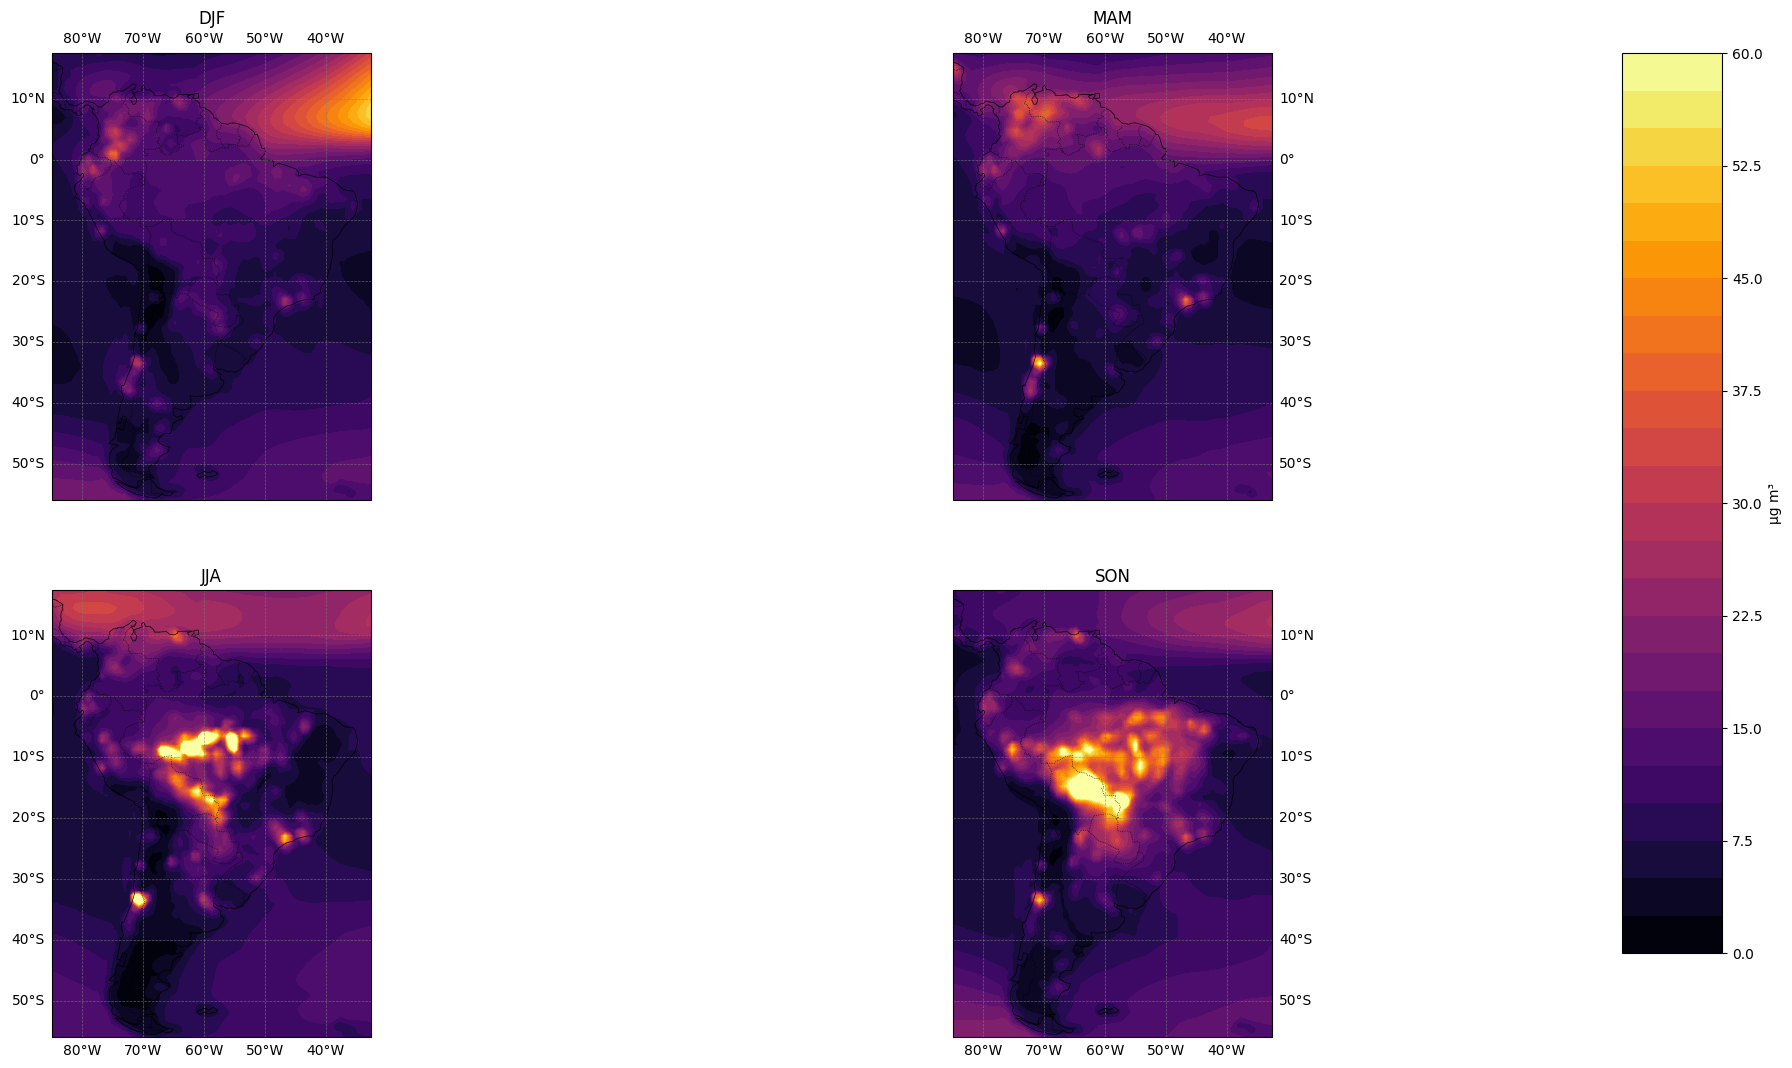

In [ ]:
seasons = ['DJF','MAM','JJA','SON']


fig = plt.figure(figsize=(20,12))
gs = gridspec.GridSpec(2,2,left = 0.09, right = 0.95, hspace = 0.2,wspace = 0.1, top = 0.9, bottom = 0.08)
cbar_ax = fig.add_axes([1,0.15,0.05,0.75])
fig.colorbar(mesh,cax=cbar_ax, label = 'μg m³')
for i in range(4):
    ax = plt.subplot(gs[i], projection = ccrs.PlateCarree())
    mesh = plt.contourf(seasonal_mean.longitude, seasonal_mean.latitude, seasonal_mean.pm2p5[i]*1e9, transform = ccrs.PlateCarree(),
                    levels = np.arange(0,60.1,2.5), cmap = 'inferno', extend = 'max')
    ax.coastlines(linewidth=0.5) #bordes costeros
    ax.add_feature(cfeat.BORDERS, linewidth=0.5, linestyle = ':') #división política
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color = 'grey', alpha=0.7, linestyle = '--') #lineas de grilla

    if i==0 or i==1:
        gl.bottom_labels=False
    if i==2 or i==3:
        gl.top_labels=False
    if i==0 or i==2:
        gl.right_labels = False
    if i==1 or i==3:
        gl.left_labels = False
    plt.title(seasons[i])
plt.show()


/tmp/ipykernel_4832/1995715259.py:7: UserWarning: Adding colorbar to a different Figure <Figure size 2200x1400 with 13 Axes> than <Figure size 2200x1400 with 1 Axes> which fig.colorbar is called on.
  fig.colorbar(mesh,cax=cbar_ax,orientation = 'horizontal', ax=ax, label = 'μg m³',cmap = 'Spectral_r')


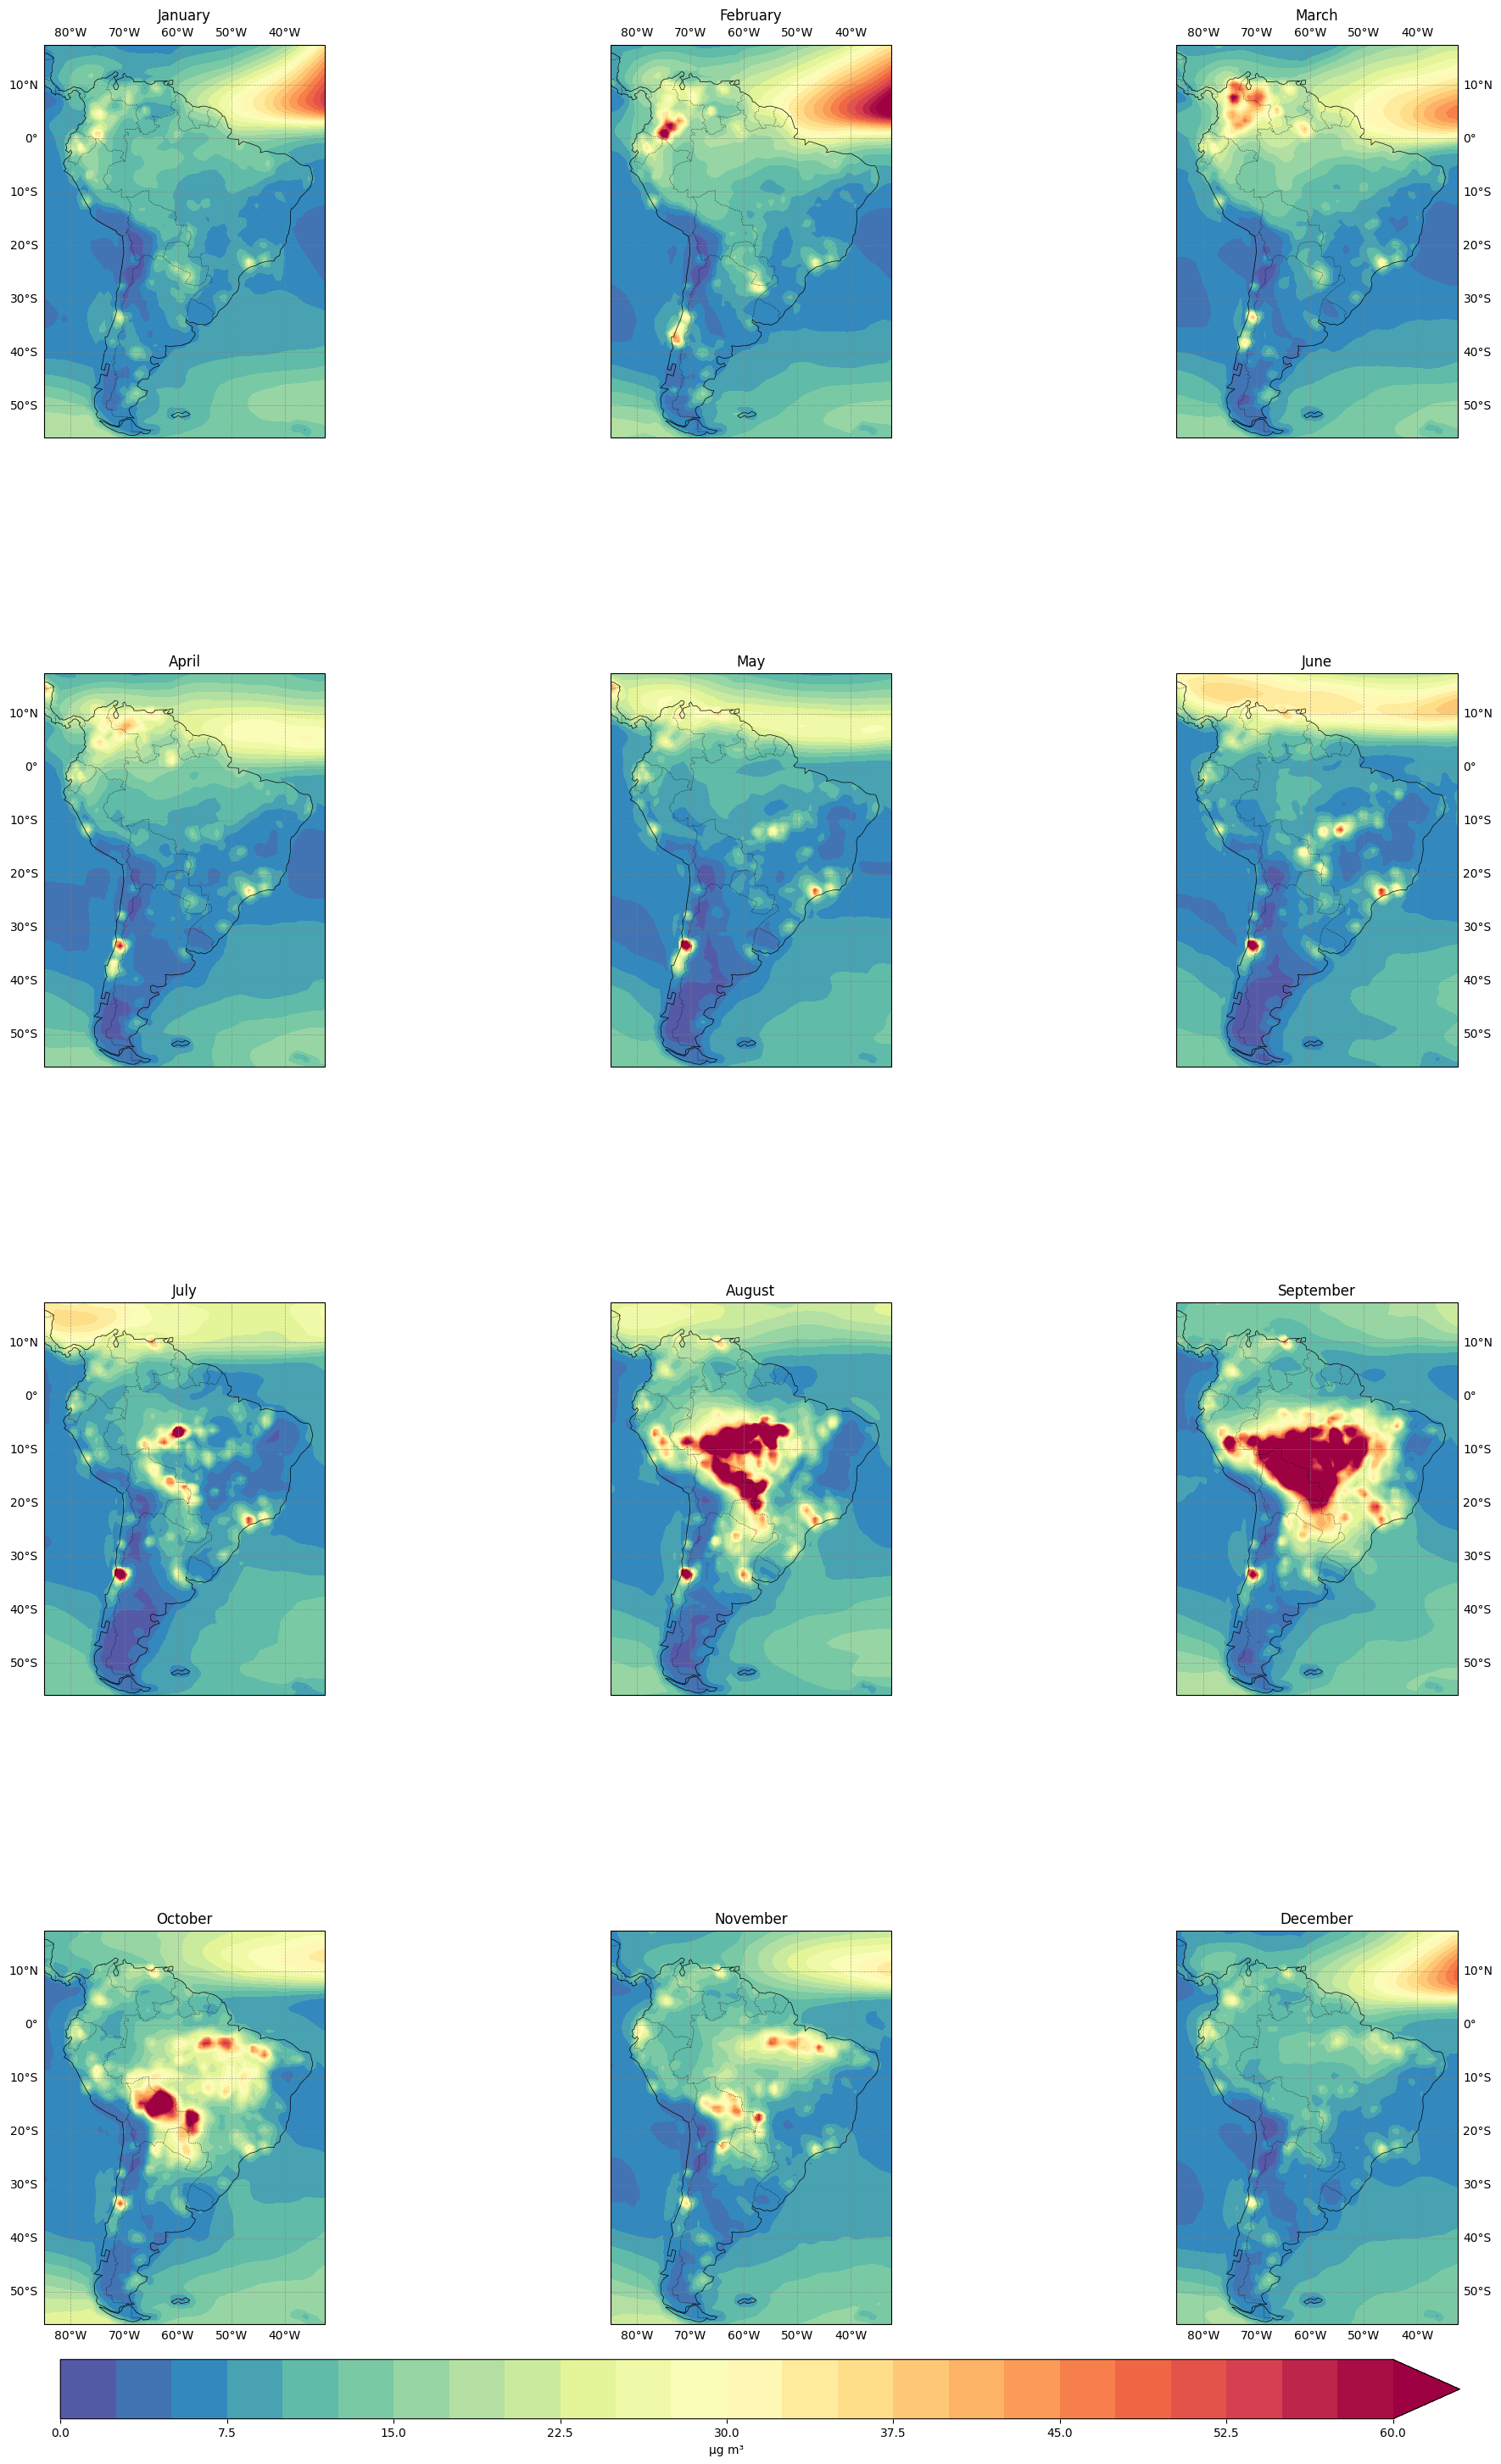

In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig = plt.figure(figsize=(22,14))
gs = gridspec.GridSpec(4,3,left = 0.09, right = 0.95, hspace = 0.6,wspace = 0.2, top = 2, bottom = 0.08)

cbar_ax = fig.add_axes([0.15,0,0.75,0.05])
fig.colorbar(mesh,cax=cbar_ax,orientation = 'horizontal', ax=ax, label = 'μg m³',cmap = 'Spectral_r')


#bar = plt.colorbar(mesh, orientation = 'horizontal', ax=ax).add_axes([1,0.15,0.05,0.75])
#fig.colorbar(mesh,cax=cbar_ax, label = 'μg m³')

for i in range (0,12):
    ax = plt.subplot(gs[i], projection = ccrs.PlateCarree())
    mesh = plt.contourf(monthly_mean.longitude, monthly_mean.latitude, monthly_mean.pm2p5[i]*1e9, transform = ccrs.PlateCarree(),
                    levels = np.arange(0,60.1,2.5), cmap = 'Spectral_r', extend = 'max')
    ax.coastlines(linewidth=0.5) #bordes costeros
    ax.add_feature(cfeat.BORDERS, linewidth=0.5, linestyle = ':') #división política
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color = 'grey', alpha=0.7, linestyle = '--') #lineas de grilla
    if i!=9 and i!=10 and i!= 11:
        gl.bottom_labels=False
    if  i!=0 and i!=1 and i!= 2:
        gl.top_labels=False
    if i!=2 and i!=5 and i!= 8 and i!= 11:
        gl.right_labels = False
    if i!=0 and i!=3 and i!= 6 and i != 9:
        gl.left_labels = False
    plt.title(months[i])

#plt.show()

In [ ]:
### CIMP

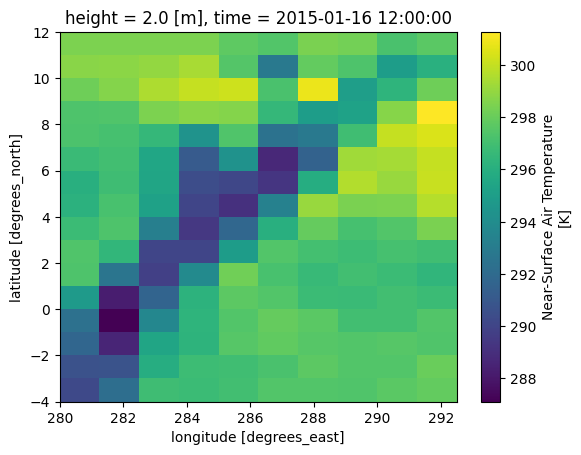

In [ ]:
ds_test = xr.open_dataset(f'{path}tas_Amon_GFDL-ESM4_ssp126_r1i1p1f1_gr1_20150116-20491216.nc')
#seleccionar periodo de tiempo
ds_periodo = ds_test.tas.loc['2025-09-01':'2049-12-31']
prueba = ds_test.sel(lon=slice(280,293),lat=slice(-4,12))
prueba.tas[0,:,:].plot()

### Ejercicio
Leer todos los archivos que inician en tas usando glob, como en el módulo anterior. poner esos archivos en un diccionario. Luego, en otro diccionario agregar para cada modelo y experimento el promedio mensual y estacional, todo en un for.

In [ ]:
dict_cmip = {}
models = ['GFDL-ESM4_historical', 'GFDL-ESM4_ssp126', 'MPI-ESM1-2-LR_historical','MPI-ESM1-2-LR_ssp126']
dict_season = {}
dict_month = {}

files = sorted(glob.glob(f'{path}tas*'))

for i,file in enumerate(files):
    dict_cmip[models[i]] = xr.open_dataset(file)
    dict_month[models[i]] = dict_cmip[models[i]].groupby('time.month').mean()
    dict_season[models[i]] = dict_cmip[models[i]].groupby('time.season').mean()

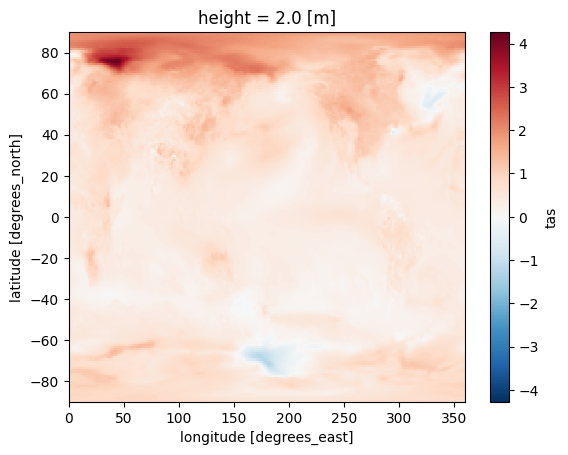

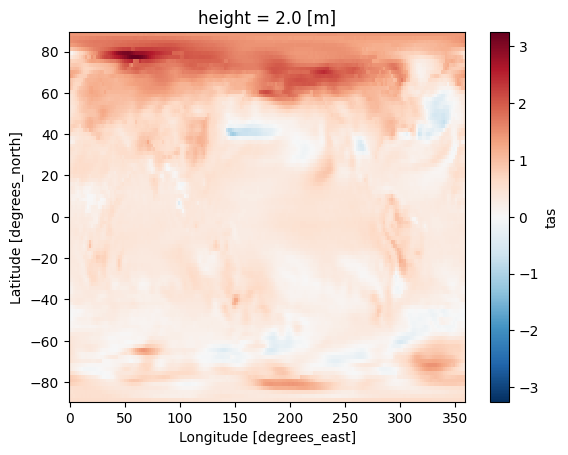

In [ ]:
for i in [0,2]:
    (dict_cmip[models[i+1]].tas.mean(dim = ['time']) - dict_cmip[models[i]].tas.mean(dim = ['time'])).plot()
    plt.show()

### Ejercicio 2
Calcular anomalías por mes y temporada, graficar usando cartopy. La idea es incluir los países y luego de analizar que zonas se ven más afectadas y por qué, o menos afectadas y porqué. El porqué no tiene que ser claro, pero puede crear hipótesis. Luego, realizar lo mismo pero en una zona en particular, no todo el globo.

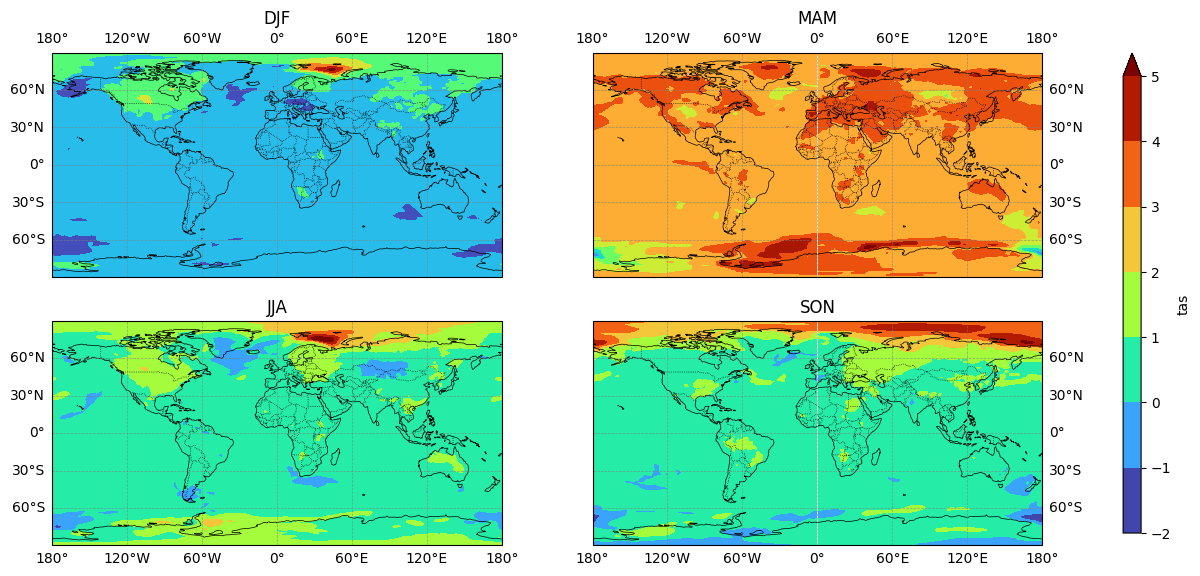

In [ ]:
#por temporada GFDL-ESM4

fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(2,2,left = 0.09, right = 0.95, hspace = 0.2,wspace = 0.1, top = 0.9, bottom = 0.08)
proj = ccrs.PlateCarree()

gdfl_season = dict_season['GFDL-ESM4_ssp126'].tas - dict_season['GFDL-ESM4_historical'].tas

for i in range(4):

    ax = plt.subplot(gs[i], projection = ccrs.PlateCarree())
    mesh = plt.contourf(gdfl_season.lon, gdfl_season.lat, gdfl_season[i,:,:], transform = ccrs.PlateCarree(),
                        extend = 'max', cmap = 'turbo')
    ax.coastlines(linewidth=0.5) #bordes costeros
    ax.add_feature(cfeat.BORDERS, linewidth=0.5, linestyle = ':') #división política
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color = 'grey', alpha=0.7, linestyle = '--') #lineas de grilla

    if i==0 or i==1:
        gl.bottom_labels=False
    if i==2 or i==3:
        gl.top_labels=False
    if i==0 or i==2:
        gl.right_labels = False
    if i==1 or i==3:
        gl.left_labels = False
    plt.title(seasons[i])

cbar_ax = fig.add_axes([1, 0.1, 0.015, 0.8])
fig.colorbar(mesh,cax=cbar_ax, label = 'tas',cmap = 'turbo')

plt.show()


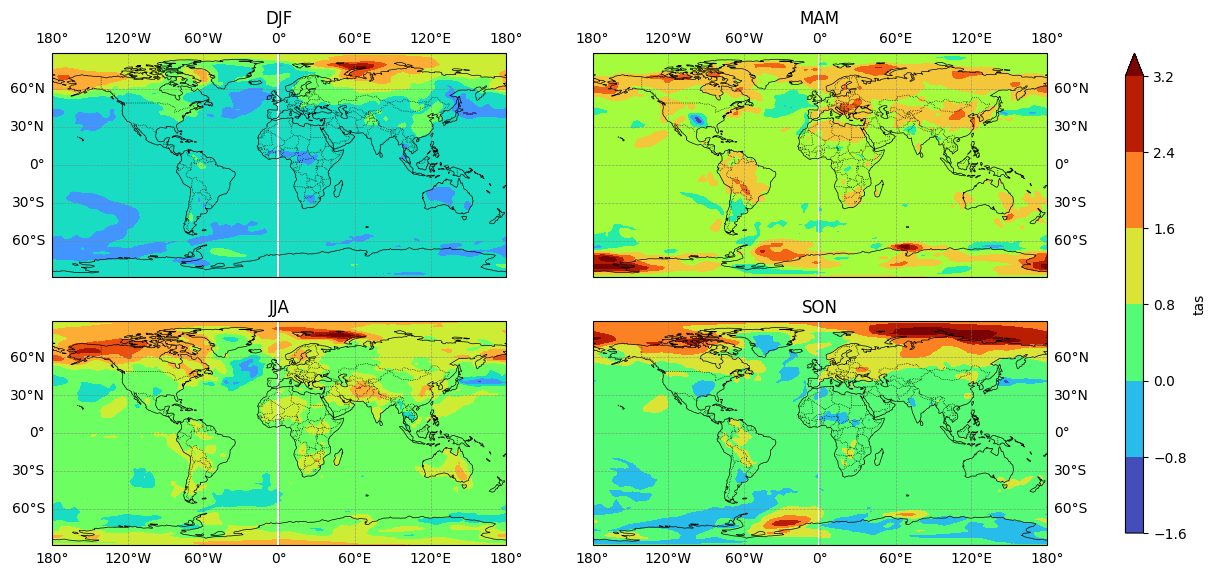

In [ ]:
#por temporada MPI-ESM1

fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(2,2,left = 0.09, right = 0.95, hspace = 0.2,wspace = 0.1, top = 0.9, bottom = 0.08)
proj = ccrs.PlateCarree()

gdfl_season = dict_season['MPI-ESM1-2-LR_ssp126'].tas - dict_season['MPI-ESM1-2-LR_historical'].tas

for i in range(4):

    ax = plt.subplot(gs[i], projection = ccrs.PlateCarree())
    mesh = plt.contourf(gdfl_season.lon, gdfl_season.lat, gdfl_season[i,:,:], transform = ccrs.PlateCarree(),
                        extend = 'max', cmap = 'turbo')
    ax.coastlines(linewidth=0.5) #bordes costeros
    ax.add_feature(cfeat.BORDERS, linewidth=0.5, linestyle = ':') #división política
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color = 'grey', alpha=0.7, linestyle = '--') #lineas de grilla

    if i==0 or i==1:
        gl.bottom_labels=False
    if i==2 or i==3:
        gl.top_labels=False
    if i==0 or i==2:
        gl.right_labels = False
    if i==1 or i==3:
        gl.left_labels = False
    plt.title(seasons[i])

cbar_ax = fig.add_axes([1, 0.1, 0.015, 0.8])
fig.colorbar(mesh,cax=cbar_ax, label = 'tas',cmap = 'turbo')

plt.show()

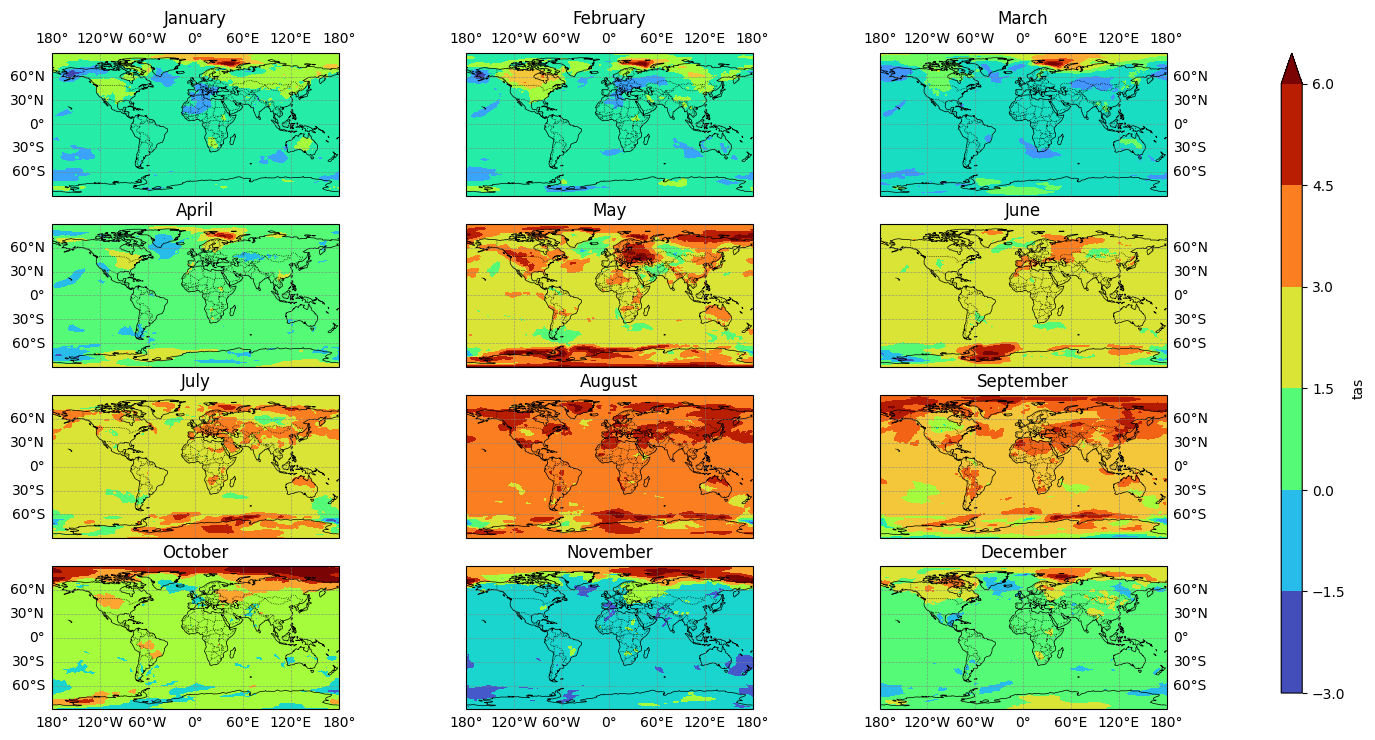

In [ ]:
#Por meses GFDL-ESM4

gdfl_month = dict_month['GFDL-ESM4_ssp126'].tas - dict_month['GFDL-ESM4_historical'].tas
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(4,3,left = 0.09, right = 0.95, hspace = 0.2,wspace = 0.1, top = 0.9, bottom = 0.08)
proj = ccrs.PlateCarree()


for i in range(12):
    ax = plt.subplot(gs[i], projection = ccrs.PlateCarree())
    mesh = plt.contourf(gdfl_month.lon, gdfl_month.lat, gdfl_month[i,:,:], transform = ccrs.PlateCarree(),
                        extend = 'max', cmap = 'turbo')
    ax.coastlines(linewidth=0.5) #bordes costeros
    ax.add_feature(cfeat.BORDERS, linewidth=0.5, linestyle = ':') #división política
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color = 'grey', alpha=0.7, linestyle = '--') #lineas de grilla

    if i!=9 and i!=10 and i!= 11:
        gl.bottom_labels=False
    if  i!=0 and i!=1 and i!= 2:
        gl.top_labels=False
    if i!=2 and i!=5 and i!= 8 and i!= 11:
        gl.right_labels = False
    if i!=0 and i!=3 and i!= 6 and i != 9:
        gl.left_labels = False
    plt.title(months[i])

cbar_ax = fig.add_axes([1, 0.1, 0.015, 0.8])
fig.colorbar(mesh,cax=cbar_ax, label = 'tas',cmap = 'turbo')

plt.show()

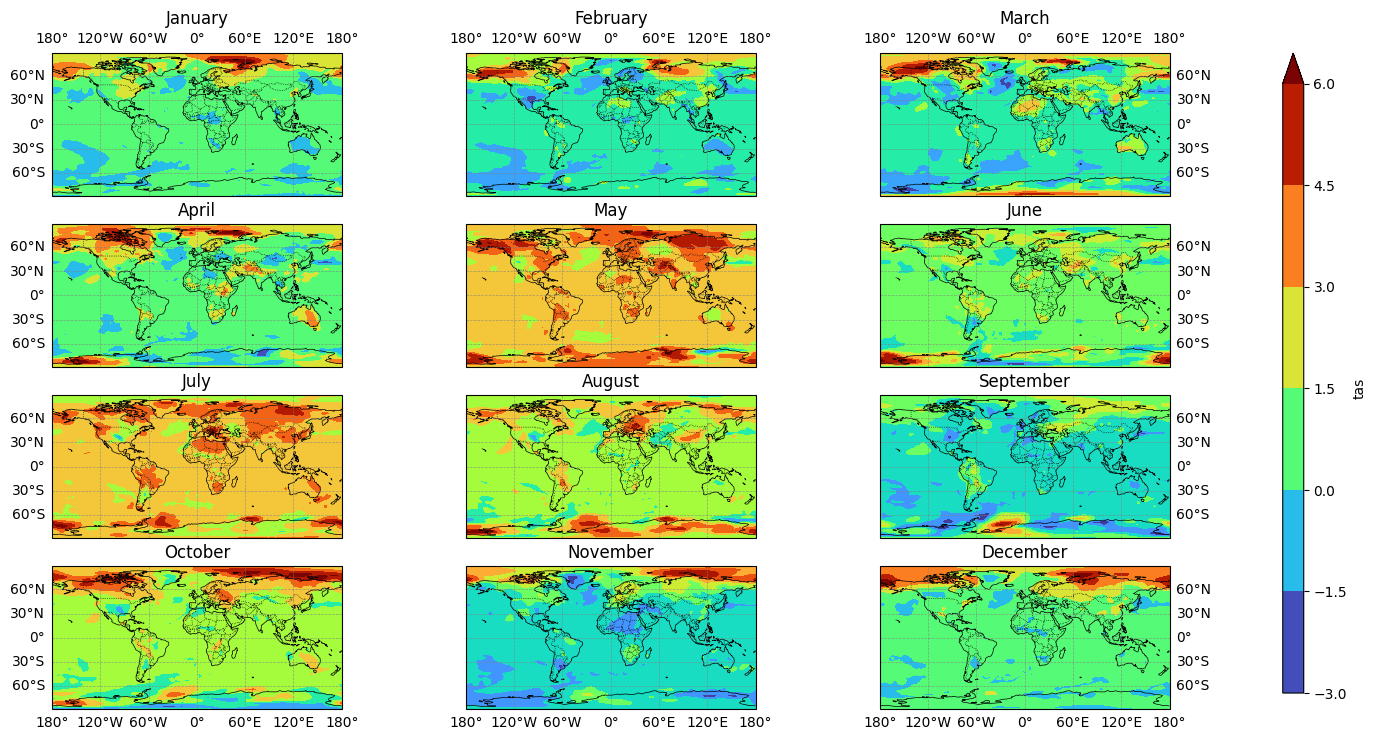

In [ ]:
#Por meses MPI-ESM1

gdfl_month = dict_month['MPI-ESM1-2-LR_ssp126'].tas - dict_month['MPI-ESM1-2-LR_historical'].tas
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(4,3,left = 0.09, right = 0.95, hspace = 0.2,wspace = 0.1, top = 0.9, bottom = 0.08)
proj = ccrs.PlateCarree()


for i in range(12):
    ax = plt.subplot(gs[i], projection = ccrs.PlateCarree())
    mesh = plt.contourf(gdfl_month.lon, gdfl_month.lat, gdfl_month[i,:,:], transform = ccrs.PlateCarree(),
                        extend = 'max', cmap = 'turbo')
    ax.coastlines(linewidth=0.5) #bordes costeros
    ax.add_feature(cfeat.BORDERS, linewidth=0.5, linestyle = ':') #división política
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color = 'grey', alpha=0.7, linestyle = '--') #lineas de grilla

    if i!=9 and i!=10 and i!= 11:
        gl.bottom_labels=False
    if  i!=0 and i!=1 and i!= 2:
        gl.top_labels=False
    if i!=2 and i!=5 and i!= 8 and i!= 11:
        gl.right_labels = False
    if i!=0 and i!=3 and i!= 6 and i != 9:
        gl.left_labels = False
    plt.title(months[i])

cbar_ax = fig.add_axes([1, 0.1, 0.015, 0.8])
fig.colorbar(mesh,cax=cbar_ax, label = 'tas',cmap = 'turbo')

plt.show()

In [ ]:
cities =['Bogota']
lats = [4.711]
lon = [-74.0721]

for i,city in enumerate(cities):
    point_data = ds_cams.sel(latitude=lats[i], longitude=lon[i], method='nearest')*1e9
    df = point_data.to_dataframe().reset_index()
    df['City'] = cities[i]
    df.set_index('valid_time', inplace= True)